# SIS on TF Binding Data

## Aggregate Analysis of Pipelined Data on Motif Occupancy Task

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

from scipy.stats import ranksums

import tf_binding as tf_binding
from tf_binding_launcher import get_datasets

In [4]:
occupancy_results_basepath = '../rationale_results/motif/motif_occupancy'

In [5]:
figures_dir = '../figures/tf_binding'

In [7]:
motif_occupancy_data_basepath = '../data/motif/data/motif_occupancy'
occupancy_datasets = get_datasets(motif_occupancy_data_basepath)
print('# occupancy datasets: ', len(occupancy_datasets))

# occupancy datasets:  422


In [8]:
# Stats on number of sequences in each dataset

train_sizes = []
test_sizes = []

for dataset in occupancy_datasets:
    train_data_path = os.path.join(motif_occupancy_data_basepath, dataset, 'train.data')
    test_data_path = os.path.join(motif_occupancy_data_basepath, dataset, 'test.data')
    train_size = len(tf_binding.load_tf_data(train_data_path))
    test_size = len(tf_binding.load_tf_data(test_data_path))
    train_sizes.append(train_size)
    test_sizes.append(test_size)

In [9]:
print('Train size mean: ', np.mean(train_sizes))
print('Train size median: ', np.median(train_sizes))
print('Train size min: ', np.min(train_sizes))
print('Train size max: ', np.max(train_sizes))
print()
print('Test size mean: ', np.mean(test_sizes))
print('Test size median: ', np.median(test_sizes))
print('Test size min: ', np.min(test_sizes))
print('Test size max: ', np.max(test_sizes))

Train size mean:  68044.20853080568
Train size median:  48694.0
Train size min:  600
Train size max:  692340

Test size mean:  17011.52606635071
Test size median:  12174.0
Test size min:  150
Test size max:  173086


In [10]:
# Count number of problematic outputs in occupancy task
bad = 0
for dataset in occupancy_datasets:
    path = os.path.join(occupancy_results_basepath, dataset)
    if 'rationales.html' not in os.listdir(path):  # didn't produce rationales html, something wrong
        bad += 1

print('# Bad, Occupancy: ', bad)

# Bad, Occupancy:  0


## Classifier Performance

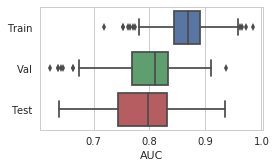

Num datasets:  422

Median AUC, Train:  0.869
Median AUC, Val:  0.809
Median AUC, Test:  0.797


In [11]:
train_aucs = []
val_aucs = []
test_aucs = []

for dataset in occupancy_datasets:
    train_stats_path = os.path.join(occupancy_results_basepath, dataset, 'train_stats.json')
    train_stats = tf_binding.load_stats(train_stats_path)
    train_aucs.append(train_stats['train']['auc'])
    val_aucs.append(train_stats['val']['auc'])
    test_aucs.append(train_stats['test']['auc'])

auc_df = pd.DataFrame({'Train': train_aucs, 'Val': val_aucs, 'Test': test_aucs})

plt.figure(figsize=(4, 2.5))
sns.boxplot(data=auc_df, orient='h', order=['Train', 'Val', 'Test'])
plt.xlabel('AUC')
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'auc_occupancy.png'), dpi=1200, bbox_inches='tight')
plt.show()

print('Num datasets: ', len(train_aucs))
print()
print('Median AUC, Train:  %.3f' % np.median(train_aucs))
print('Median AUC, Val:  %.3f' % np.median(val_aucs))
print('Median AUC, Test:  %.3f' % np.median(test_aucs))

## Thresholds Selected (90th Percentile of Test Set Predictive Distributions)

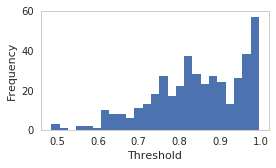

In [26]:
thresholds_occupancy = []

for dataset in occupancy_datasets:
    train_stats_path = os.path.join(occupancy_results_basepath, dataset, 'train_stats.json')
    train_stats = tf_binding.load_stats(train_stats_path)
    thresholds_occupancy.append(train_stats['threshold'])

thresholds_occupancy = np.array(thresholds_occupancy)

# Threshold plot
plt.figure(figsize=(4, 2.5))
plt.hist(thresholds_occupancy, bins=25, alpha=1.0)
plt.xlabel('Threshold')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'thresholds_hist.png'), dpi=1200, bbox_inches='tight')
plt.show()

## Rationale Lengths

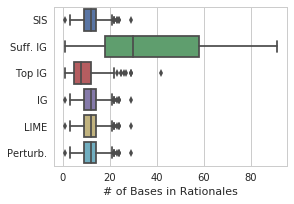

# Datasets aggregated = 422

Median of medians, SIS:  12.0
Median of medians, IG:  30.0
Median of medians, Top IG:  8.0
Median of medians, IG Fixed Length:  12.0
Median of medians, LIME Fixed Length:  12.0
Median of medians, Perturb. Fixed Length:  12.0

SIS vs. IG:  RanksumsResult(statistic=-18.500237547217388, pvalue=2.0556595913546008e-76)
SIS vs. Top IG:  RanksumsResult(statistic=9.854716465495686, pvalue=6.540102241385525e-23)
SIS vs. IG Fixed Length:  RanksumsResult(statistic=-0.17776471136985555, pvalue=0.8589077621382655)
SIS vs. LIME Fixed Length:  RanksumsResult(statistic=-0.17776471136985555, pvalue=0.8589077621382655)
SIS vs. Perturb. Fixed Length:  RanksumsResult(statistic=-0.17776471136985555, pvalue=0.8589077621382655)


In [15]:
median_rationale_length_sis = []
median_rationale_length_ig = []
median_rationale_length_top_ig = []
median_rationale_length_ig_fixed_length = []
median_rationale_length_lime_fixed_length = []
median_rationale_length_pert_fixed_length = []

median_rationale_only_preds_sis = []
median_rationale_only_preds_ig = []
median_rationale_only_preds_top_ig = []
median_rationale_only_preds_ig_fixed_length = []
median_rationale_only_preds_lime_fixed_length = []
median_rationale_only_preds_pert_fixed_length = []

for dataset in occupancy_datasets:
    stats_path = os.path.join(occupancy_results_basepath, dataset, 'stats.json')
    stats = tf_binding.load_stats(stats_path)
    median_rationale_length_sis.append(stats['rationale_lengths']['sis']['median'])
    median_rationale_length_ig.append(stats['rationale_lengths']['ig']['median'])
    median_rationale_length_top_ig.append(stats['rationale_lengths']['top_ig']['median'])
    median_rationale_length_ig_fixed_length.append(stats['rationale_lengths']['fixed_length_ig']['median'])
    median_rationale_length_lime_fixed_length.append(stats['rationale_lengths']['fixed_length_lime']['median'])
    median_rationale_length_pert_fixed_length.append(stats['rationale_lengths']['fixed_length_pert']['median'])

    median_rationale_only_preds_sis.append(stats['rationale_only_predictions']['sis']['median'])
    median_rationale_only_preds_ig.append(stats['rationale_only_predictions']['ig']['median'])
    median_rationale_only_preds_top_ig.append(stats['rationale_only_predictions']['top_ig']['median'])
    median_rationale_only_preds_ig_fixed_length.append(stats['rationale_only_predictions']['ig_fixed_length']['median'])
    median_rationale_only_preds_lime_fixed_length.append(stats['rationale_only_predictions']['lime_fixed_length']['median'])
    median_rationale_only_preds_pert_fixed_length.append(stats['rationale_only_predictions']['pert_fixed_length']['median'])

median_rationale_length_sis = np.array(median_rationale_length_sis)
median_rationale_length_ig = np.array(median_rationale_length_ig)
median_rationale_length_top_ig = np.array(median_rationale_length_top_ig)
median_rationale_length_ig_fixed_length = np.array(median_rationale_length_ig_fixed_length)
median_rationale_length_lime_fixed_length = np.array(median_rationale_length_lime_fixed_length)
median_rationale_length_pert_fixed_length = np.array(median_rationale_length_pert_fixed_length)

median_rationale_only_preds_sis = np.array(median_rationale_only_preds_sis)
median_rationale_only_preds_ig = np.array(median_rationale_only_preds_ig)
median_rationale_only_preds_top_ig = np.array(median_rationale_only_preds_top_ig)
median_rationale_only_preds_ig_fixed_length = np.array(median_rationale_only_preds_ig_fixed_length)
median_rationale_only_preds_lime_fixed_length = np.array(median_rationale_only_preds_lime_fixed_length)
median_rationale_only_preds_pert_fixed_length = np.array(median_rationale_only_preds_pert_fixed_length)

rationale_len_df = pd.DataFrame({'SIS': median_rationale_length_sis,
                                 'Suff. IG': median_rationale_length_ig,
                                 'Top IG': median_rationale_length_top_ig,
                                 'IG': median_rationale_length_ig_fixed_length,
                                 'LIME': median_rationale_length_lime_fixed_length,
                                 'Perturb.': median_rationale_length_pert_fixed_length})

# Boxplot
plt.figure(figsize=(4.25, 3.0))
sns.boxplot(data=rationale_len_df, orient='h',
            order=['SIS', 'Suff. IG', 'Top IG', 'IG', 'LIME', 'Perturb.'])
plt.xlabel('# of Bases in Rationales')
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'rationale_lengths_boxplot.png'), dpi=1200, bbox_inches='tight')
plt.show()

print('# Datasets aggregated =', len(median_rationale_length_sis))
print()
print('Median of medians, SIS: ', np.median(median_rationale_length_sis))
print('Median of medians, IG: ', np.median(median_rationale_length_ig))
print('Median of medians, Top IG: ', np.median(median_rationale_length_top_ig))
print('Median of medians, IG Fixed Length: ', np.median(median_rationale_length_ig_fixed_length))
print('Median of medians, LIME Fixed Length: ', np.median(median_rationale_length_lime_fixed_length))
print('Median of medians, Perturb. Fixed Length: ', np.median(median_rationale_length_pert_fixed_length))
print()
print('SIS vs. IG: ', ranksums(median_rationale_length_sis, median_rationale_length_ig))
print('SIS vs. Top IG: ', ranksums(median_rationale_length_sis, median_rationale_length_top_ig))
print('SIS vs. IG Fixed Length: ', ranksums(median_rationale_length_sis, median_rationale_length_ig_fixed_length))
print('SIS vs. LIME Fixed Length: ', ranksums(median_rationale_length_sis, median_rationale_length_lime_fixed_length))
print('SIS vs. Perturb. Fixed Length: ', ranksums(median_rationale_length_sis, median_rationale_length_pert_fixed_length))

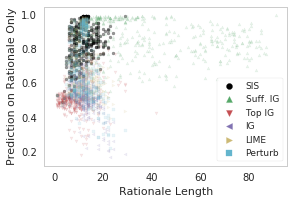

In [16]:
plt.figure(figsize=(4.25, 3.0))
plt.scatter(median_rationale_length_sis, median_rationale_only_preds_sis,
            alpha=0.40, s=9, c='black', marker='o', label='SIS')
plt.scatter(median_rationale_length_ig, median_rationale_only_preds_ig,
            alpha=0.13, s=9, c=sns.color_palette()[1], marker='^', label='Suff. IG')
plt.scatter(median_rationale_length_top_ig, median_rationale_only_preds_top_ig,
            alpha=0.13, s=9, c=sns.color_palette()[2], marker='v', label='Top IG')
plt.scatter(median_rationale_length_ig_fixed_length, median_rationale_only_preds_ig_fixed_length,
            alpha=0.13, s=9, c=sns.color_palette()[3], marker='<', label='IG')
plt.scatter(median_rationale_length_lime_fixed_length, median_rationale_only_preds_lime_fixed_length,
            alpha=0.13, s=9, c=sns.color_palette()[4], marker='>', label='LIME')
plt.scatter(median_rationale_length_pert_fixed_length, median_rationale_only_preds_pert_fixed_length,
            alpha=0.13, s=9, c=sns.color_palette()[5], marker='s', label='Perturb')
plt.xlabel('Rationale Length')
plt.ylabel('Prediction on Rationale Only')
plt.grid(False)
leg = plt.legend(loc='lower right', frameon=True, markerscale=2, fontsize=9)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'rationale_prediction_vs_length.png'), dpi=1200, bbox_inches='tight')
plt.show()

## Perturbation Analysis

In [17]:
median_rationale_perturb_sis = []
median_nonrationale_perturb_sis = []

median_rationale_perturb_ig = []
median_nonrationale_perturb_ig = []

median_rationale_perturb_top_ig = []
median_nonrationale_perturb_top_ig = []

median_rationale_perturb_ig_fixed_length = []
median_nonrationale_perturb_ig_fixed_length = []

median_rationale_perturb_lime_fixed_length = []
median_nonrationale_perturb_lime_fixed_length = []

median_rationale_perturb_pert_fixed_length = []
median_nonrationale_perturb_pert_fixed_length = []

for dataset in occupancy_datasets:
    stats_path = os.path.join(occupancy_results_basepath, dataset, 'stats.json')
    stats = tf_binding.load_stats(stats_path)

    median_rationale_perturb_sis.append(stats['perturbation']['sis']['rationale']['median'])
    median_nonrationale_perturb_sis.append(stats['perturbation']['sis']['nonrationale']['median'])

    median_rationale_perturb_ig.append(stats['perturbation']['ig']['rationale']['median'])
    median_nonrationale_perturb_ig.append(stats['perturbation']['ig']['nonrationale']['median'])

    median_rationale_perturb_top_ig.append(stats['perturbation']['top_ig']['rationale']['median'])
    median_nonrationale_perturb_top_ig.append(stats['perturbation']['top_ig']['nonrationale']['median'])

    median_rationale_perturb_ig_fixed_length.append(stats['perturbation']['ig_fixed_length']['rationale']['median'])
    median_nonrationale_perturb_ig_fixed_length.append(stats['perturbation']['ig_fixed_length']['nonrationale']['median'])

    median_rationale_perturb_lime_fixed_length.append(stats['perturbation']['lime_fixed_length']['rationale']['median'])
    median_nonrationale_perturb_lime_fixed_length.append(stats['perturbation']['lime_fixed_length']['nonrationale']['median'])

    median_rationale_perturb_pert_fixed_length.append(stats['perturbation']['pert_fixed_length']['rationale']['median'])
    median_nonrationale_perturb_pert_fixed_length.append(stats['perturbation']['pert_fixed_length']['nonrationale']['median'])


print('# Datasets aggregated =', len(median_rationale_perturb_sis))
print('')
print('Median of medians, Perturbation Rationale SIS: ', np.median(median_rationale_perturb_sis))
print('Median of medians, Perturbation Non-rationale SIS: ', np.median(median_nonrationale_perturb_sis))
print(ranksums(median_rationale_perturb_sis, median_nonrationale_perturb_sis))
print('')
print('Median of medians, Perturbation Rationale IG: ', np.median(median_rationale_perturb_ig))
print('Median of medians, Perturbation Non-rationale IG: ', np.median(median_nonrationale_perturb_ig))
print(ranksums(median_rationale_perturb_ig, median_nonrationale_perturb_ig))
print('')
print('Median of medians, Perturbation Rationale Top IG: ', np.median(median_rationale_perturb_top_ig))
print('Median of medians, Perturbation Non-rationale Top IG: ', np.median(median_nonrationale_perturb_top_ig))
print(ranksums(median_rationale_perturb_top_ig, median_nonrationale_perturb_top_ig))
print('')
print('Median of medians, Perturbation Rationale Fixed Length IG: ', np.median(median_rationale_perturb_ig_fixed_length))
print('Median of medians, Perturbation Non-rationale Fixed Length IG: ', np.median(median_nonrationale_perturb_ig_fixed_length))
print(ranksums(median_rationale_perturb_ig_fixed_length, median_nonrationale_perturb_ig_fixed_length))
print('')
print('Median of medians, Perturbation Rationale Fixed Length LIME: ', np.median(median_rationale_perturb_lime_fixed_length))
print('Median of medians, Perturbation Non-rationale Fixed Length LIME: ', np.median(median_nonrationale_perturb_lime_fixed_length))
print(ranksums(median_rationale_perturb_lime_fixed_length, median_nonrationale_perturb_lime_fixed_length))
print('')
print('Median of medians, Perturbation Rationale Fixed Length Perturb.: ', np.median(median_rationale_perturb_pert_fixed_length))
print('Median of medians, Perturbation Non-rationale Fixed Length Perturb.: ', np.median(median_nonrationale_perturb_pert_fixed_length))
print(ranksums(median_rationale_perturb_pert_fixed_length, median_nonrationale_perturb_pert_fixed_length))
print('')

print('Rationales only:')
print('SIS vs. IG: ', ranksums(median_rationale_perturb_sis, median_rationale_perturb_ig))
print('SIS vs. Top IG: ', ranksums(median_rationale_perturb_sis, median_rationale_perturb_top_ig))
print('SIS vs. Fixed Length IG: ', ranksums(median_rationale_perturb_sis, median_rationale_perturb_ig_fixed_length))
print('SIS vs. Fixed Length LIME: ', ranksums(median_rationale_perturb_sis, median_rationale_perturb_lime_fixed_length))
print('SIS vs. Fixed Length Perturb.: ', ranksums(median_rationale_perturb_sis, median_rationale_perturb_pert_fixed_length))

# Datasets aggregated = 422

Median of medians, Perturbation Rationale SIS:  0.011340096592903137
Median of medians, Perturbation Non-rationale SIS:  -0.00015360116958618164
RanksumsResult(statistic=25.130197664042598, pvalue=2.326748490685016e-139)

Median of medians, Perturbation Rationale IG:  0.0027473419904708862
Median of medians, Perturbation Non-rationale IG:  -0.00021438300609588623
RanksumsResult(statistic=22.292739649992864, pvalue=4.345692352107898e-110)

Median of medians, Perturbation Rationale Top IG:  0.0123748779296875
Median of medians, Perturbation Non-rationale Top IG:  -1.2129545211791992e-05
RanksumsResult(statistic=24.71423671114697, pvalue=7.51903695090451e-135)

Median of medians, Perturbation Rationale Fixed Length IG:  0.015834659337997437
Median of medians, Perturbation Non-rationale Fixed Length IG:  -1.1146068572998047e-05
RanksumsResult(statistic=24.99606225832269, pvalue=6.746843842562703e-138)

Median of medians, Perturbation Rationale Fixed Length LIME

In [18]:
columns = ['method', 'rationale_nonrationale', 'perturbation_delta']

sis_rationale_df = pd.DataFrame([('SIS', 'Rationale', p) for p in median_rationale_perturb_sis],
                                   columns=columns)
sis_nonrationale_df = pd.DataFrame([('SIS', 'Non-rationale', p) for p in median_nonrationale_perturb_sis],
                                   columns=columns)

ig_rationale_df = pd.DataFrame([('Suff. IG', 'Rationale', p) for p in median_rationale_perturb_ig],
                                   columns=columns)
ig_nonrationale_df = pd.DataFrame([('Suff. IG', 'Non-rationale', p) for p in median_nonrationale_perturb_ig],
                                   columns=columns)

top_ig_rationale_df = pd.DataFrame([('Top IG', 'Rationale', p) for p in median_rationale_perturb_top_ig],
                                   columns=columns)
top_ig_nonrationale_df = pd.DataFrame([('Top IG', 'Non-rationale', p) for p in median_nonrationale_perturb_top_ig],
                                   columns=columns)

fixed_length_ig_rationale_df = pd.DataFrame([('IG', 'Rationale', p) for p in median_rationale_perturb_ig_fixed_length],
                                   columns=columns)
fixed_length_ig_nonrationale_df = pd.DataFrame([('IG', 'Non-rationale', p) for p in median_nonrationale_perturb_ig_fixed_length],
                                   columns=columns)

fixed_length_lime_rationale_df = pd.DataFrame([('LIME', 'Rationale', p) for p in median_rationale_perturb_lime_fixed_length],
                                   columns=columns)
fixed_length_lime_nonrationale_df = pd.DataFrame([('LIME', 'Non-rationale', p) for p in median_nonrationale_perturb_lime_fixed_length],
                                   columns=columns)

fixed_length_pert_rationale_df = pd.DataFrame([('Perturb.', 'Rationale', p) for p in median_rationale_perturb_pert_fixed_length],
                                   columns=columns)
fixed_length_pert_nonrationale_df = pd.DataFrame([('Perturb.', 'Non-rationale', p) for p in median_nonrationale_perturb_pert_fixed_length],
                                   columns=columns)

perturbation_df = pd.concat([sis_rationale_df, sis_nonrationale_df,
                             ig_rationale_df, ig_nonrationale_df,
                             top_ig_rationale_df, top_ig_nonrationale_df,
                             fixed_length_ig_rationale_df, fixed_length_ig_nonrationale_df,
                             fixed_length_lime_rationale_df, fixed_length_lime_nonrationale_df,
                             fixed_length_pert_rationale_df, fixed_length_pert_nonrationale_df],
                            ignore_index=True)

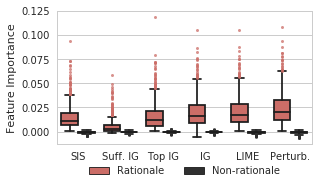

In [19]:
# https://stackoverflow.com/questions/36874697/how-to-edit-properties-of-whiskers-fliers-caps-etc-in-seaborn-boxplot
#   for boxplot drawing

plt.figure(figsize=(4.5, 2.75))
ax = sns.boxplot(x='method', y='perturbation_delta', hue='rationale_nonrationale',
            data=perturbation_df, orient='v',
            palette=sns.color_palette([sns.color_palette('hls', 8)[0], sns.light_palette('black', reverse=True)[1]]),
            flierprops={'markersize': 3, 'marker': 'o', 'alpha': 0.75})
for i, artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    for j in range(i*6, i*6+6):
        line = ax.lines[j]
        line.set_mfc(col)
        line.set_mec(col)
plt.xlabel('')
plt.ylabel('Feature Importance')
plt.legend(loc='center', title=None, frameon=False, ncol=2, bbox_to_anchor=(0.5, -0.2))
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'perturbation_boxplot.png'), dpi=1200, bbox_inches='tight')
plt.show()

## Aligning Known Motifs to Rationales

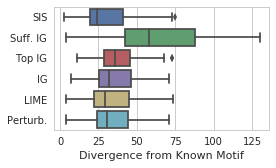

# Datasets aggregated = 422

Median of medians, SIS:  23.839859678634248
Median of medians, IG:  58.112941696918256
Median of medians, Top IG:  35.96351818442918
Median of medians, IG Fixed Length:  32.078982741422884
Median of medians, LIME Fixed Length:  29.328384375127147
Median of medians, Perturb. Fixed Length:  30.378907714129703

SIS vs. IG:  RanksumsResult(statistic=-16.325408437423995, pvalue=6.510353078315638e-60)
SIS vs. Top IG:  RanksumsResult(statistic=-9.5462050323399, pvalue=1.3453432902513507e-21)
SIS vs. IG Fixed Length:  RanksumsResult(statistic=-7.166642934868752, pvalue=7.685914843043185e-13)
SIS vs. LIME Fixed Length:  RanksumsResult(statistic=-4.404159552858248, pvalue=1.0619476646027827e-05)
SIS vs. Perturb. Fixed Length:  RanksumsResult(statistic=-5.605024421961204, pvalue=2.0822560219872534e-08)


In [20]:
median_align_scores_sis = []
median_align_scores_ig = []
median_align_scores_top_ig = []
median_align_scores_ig_fixed_length = []
median_align_scores_lime_fixed_length = []
median_align_scores_pert_fixed_length = []

for dataset in occupancy_datasets:
    stats_path = os.path.join(occupancy_results_basepath, dataset, 'stats.json')
    stats = tf_binding.load_stats(stats_path)
    median_align_scores_sis.append(stats['alignment']['sis']['median'])
    median_align_scores_ig.append(stats['alignment']['ig']['median'])
    median_align_scores_top_ig.append(stats['alignment']['top_ig']['median'])
    median_align_scores_ig_fixed_length.append(stats['alignment']['fixed_length_ig']['median'])
    median_align_scores_lime_fixed_length.append(stats['alignment']['fixed_length_lime']['median'])
    median_align_scores_pert_fixed_length.append(stats['alignment']['fixed_length_pert']['median'])

median_align_scores_sis = np.array(median_align_scores_sis)
median_align_scores_ig = np.array(median_align_scores_ig)
median_align_scores_top_ig = np.array(median_align_scores_top_ig)
median_align_scores_ig_fixed_length = np.array(median_align_scores_ig_fixed_length)
median_align_scores_lime_fixed_length = np.array(median_align_scores_lime_fixed_length)
median_align_scores_pert_fixed_length = np.array(median_align_scores_pert_fixed_length)


median_align_scores_df = pd.DataFrame({'SIS': median_align_scores_sis,
                                       'Suff. IG': median_align_scores_ig,
                                       'Top IG': median_align_scores_top_ig,
                                       'IG': median_align_scores_ig_fixed_length,
                                       'LIME': median_align_scores_lime_fixed_length,
                                       'Perturb.': median_align_scores_pert_fixed_length})

plt.figure(figsize=(4, 2.5))
sns.boxplot(data=median_align_scores_df, orient='h', order=['SIS', 'Suff. IG', 'Top IG', 'IG', 'LIME', 'Perturb.'])
plt.xlabel('Divergence from Known Motif')
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'motif_alignment_boxplot.png'), dpi=1200, bbox_inches='tight')
plt.show()

print('# Datasets aggregated =', len(median_align_scores_sis))
print()
print('Median of medians, SIS: ', np.median(median_align_scores_sis))
print('Median of medians, IG: ', np.median(median_align_scores_ig))
print('Median of medians, Top IG: ', np.median(median_align_scores_top_ig))
print('Median of medians, IG Fixed Length: ', np.median(median_align_scores_ig_fixed_length))
print('Median of medians, LIME Fixed Length: ', np.median(median_align_scores_lime_fixed_length))
print('Median of medians, Perturb. Fixed Length: ', np.median(median_align_scores_pert_fixed_length))
print()
print('SIS vs. IG: ', ranksums(median_align_scores_sis, median_align_scores_ig))
print('SIS vs. Top IG: ', ranksums(median_align_scores_sis, median_align_scores_top_ig))
print('SIS vs. IG Fixed Length: ', ranksums(median_align_scores_sis, median_align_scores_ig_fixed_length))
print('SIS vs. LIME Fixed Length: ', ranksums(median_align_scores_sis, median_align_scores_lime_fixed_length))
print('SIS vs. Perturb. Fixed Length: ', ranksums(median_align_scores_sis, median_align_scores_pert_fixed_length))

## Number of Sufficient Rationales

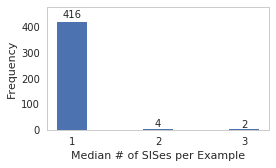

In [21]:
median_num_suffic_rationales = []

for dataset in occupancy_datasets:
    stats_path = os.path.join(occupancy_results_basepath, dataset, 'stats.json')
    stats = tf_binding.load_stats(stats_path)
    median_num_suffic_rationales.append(stats['num_suffic_rationales']['median'])

median_num_suffic_rationales = np.array(median_num_suffic_rationales)

# Bar plot
bins, counts = np.unique(median_num_suffic_rationales, return_counts=True)
num_bins = len(bins)
width = 0.35

plt.figure(figsize=(4, 2.5))
rects = plt.bar(bins, counts, width)
# Display count above each bar
for i, rect in enumerate(rects):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.025*height,
            '%d' % counts[i],
            ha='center', va='bottom', fontsize=10)
plt.xlabel('Median # of SISes per Example')
plt.ylabel('Frequency')
plt.ylim([0, max(counts)+60])  # leave room for text label
plt.xticks(bins)
plt.grid(False)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'num_suffic_rationales.png'), dpi=1200, bbox_inches='tight')
plt.show()